In [1]:
CATBOOST_VERSION = 1.0

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn import set_config
from catboost import CatBoostRegressor
from datetime import timedelta
from lightgbm import LGBMRegressor
import lightgbm as lgb
import optuna
from optuna.distributions import CategoricalDistribution, IntDistribution, FloatDistribution
from optuna.integration import OptunaSearchCV
from optuna.integration.lightgbm import LightGBMTunerCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from category_encoders import TargetEncoder, BinaryEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from category_encoders import TargetEncoder, BinaryEncoder

In [3]:
X_train = pd.read_csv('X_train.csv', encoding='cp949').drop(columns='ID')
y_train = pd.read_csv('y_train.csv', encoding='cp949').Salary

X_test = pd.read_csv('X_test.csv', encoding='cp949')
test_id = X_test.ID
X_test = X_test.drop(columns='ID')

In [4]:
pd.set_option('display.max_rows', 10)

In [5]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 16570 entries, 0 to 16569
Series name: Salary
Non-Null Count  Dtype
--------------  -----
16570 non-null  int64
dtypes: int64(1)
memory usage: 129.6 KB


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16570 entries, 0 to 16569
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   직종      16570 non-null  object 
 1   세부직종    16570 non-null  object 
 2   직무태그    14055 non-null  object 
 3   근무경력    16570 non-null  object 
 4   근무형태    6661 non-null   object 
 5   근무지역    16570 non-null  object 
 6   출신대학    16570 non-null  object 
 7   대학전공    16570 non-null  object 
 8   어학시험    4988 non-null   object 
 9   자격증     16570 non-null  object 
 10  대학성적    14600 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [7]:
## 어학시험 결측치 처리
X_train['어학시험'] = X_train['어학시험'].fillna('없음')
X_train = X_train.replace({'어학시험' :' '},'없음') 

X_test['어학시험'] = X_test['어학시험'].fillna('없음')
X_test = X_test.replace({'어학시험' :' '},'없음') 

In [8]:
for i , j in  zip(X_train['대학전공'].str.contains('호텔'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'호텔',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('관광'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'관광',inplace=True)   
        
for i , j in  zip(X_train['대학전공'].str.contains('체육'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'체육',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('무역'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'무역',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('국제통상'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'국제통상',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('통계'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'통계',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('조리'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'조리',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('경영'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'경영',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('경제'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'경제',inplace=True)

for i , j in  zip(X_train['대학전공'].str.contains('디자인'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'디자인',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('경제'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'경제',inplace=True)

for i , j in  zip(X_train['대학전공'].str.contains('컴퓨터'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'컴퓨터',inplace=True)

for i , j in  zip(X_train['대학전공'].str.contains('교육'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'교육',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('스포츠'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'체육',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('영어'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'영어영문',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('중국어'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'중어중문',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('중국'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'중국학과',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('광고'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'광고',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('미술'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'미술',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('정치'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'정치',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('전기'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'전기',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('국문'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'국문',inplace=True)

for i , j in  zip(X_train['대학전공'].str.contains('의류'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'의류',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('패션'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'의류',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('화학'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'화학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('생명'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'생명',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('물리'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'물리',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('사학'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'사학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('행정'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'행정',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('통상'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'국제통상',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('산업'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'산업공학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('심리'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'심리',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('법'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'법학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('조형'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'조형',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('수학'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'수학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('문헌'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'문헌정보',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('회계'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'회계',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('정보'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'정보통신',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('중어'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'중어중문',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('전자'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'전자과',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('독어'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'독어독문',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('일어'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'일어일문',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('불어'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'불어일문',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('토목'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'토목',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('건축'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'건축',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('전산'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'전산학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('기계'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'기계공학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('복지'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'복지',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('사회'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'사회학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('보험'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'보험',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('금융'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'금융',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('환경'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'환경',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('금속'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'금속공학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('도시'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'도시',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('미디어'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'멀티미디어',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('제어'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'제어계측',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('신소재'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'신소재',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('신문'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'신문방송',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('통신'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'정보통신',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('식품'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'식품영양',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('생물'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'생물학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('유전'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'유전공학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('가정'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'가정',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('소프트'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'컴퓨터',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('지리'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'지리학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('지리'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'지리학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('섬유'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'섬유공학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('의상'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'의상학과',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('보건'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'보건관리',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('신학'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'신학과',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('신학'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'신학과',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('자원'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'자원공학',inplace=True)
                                
for i , j in  zip(X_train['대학전공'].str.contains('국제'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'국제통상',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('공예'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'공예',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('일본'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'일어일문',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('메카'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'메카트로닉스',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('영문'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'영어영문',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('간호'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'간호학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('영양'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'식품영양',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('분자'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'고분자',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('아동'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'아동학',inplace=True)
        
for i , j in  zip(X_train['대학전공'].str.contains('무용'), X_train['대학전공']) :
    if i ==True:
        X_train['대학전공'].replace(j,'무용',inplace=True)

In [9]:
for i , j in  zip(X_test['대학전공'].str.contains('호텔'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'호텔',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('관광'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'관광',inplace=True)   
        
for i , j in  zip(X_test['대학전공'].str.contains('체육'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'체육',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('무역'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'무역',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('국제통상'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'국제통상',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('통계'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'통계',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('조리'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'조리',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('경영'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'경영',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('경제'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'경제',inplace=True)

for i , j in  zip(X_test['대학전공'].str.contains('디자인'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'디자인',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('경제'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'경제',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('컴퓨터'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'컴퓨터',inplace=True)

for i , j in  zip(X_test['대학전공'].str.contains('교육'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'교육',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('스포츠'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'체육',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('영어'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'영어영문',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('중국어'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'중어중문',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('중국'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'중국학과',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('광고'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'광고',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('미술'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'미술',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('정치'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'정치',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('전기'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'전기',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('국문'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'국문',inplace=True)

for i , j in  zip(X_test['대학전공'].str.contains('의류'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'의류',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('패션'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'의류',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('화학'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'화학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('생명'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'생명',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('물리'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'물리',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('사학'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'사학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('행정'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'행정',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('통상'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'국제통상',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('산업'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'산업공학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('심리'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'심리',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('법'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'법학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('조형'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'조형',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('수학'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'수학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('문헌'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'문헌정보',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('회계'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'회계',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('정보'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'정보통신',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('중어'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'중어중문',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('전자'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'전자과',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('독어'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'독어독문',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('일어'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'일어일문',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('불어'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'불어일문',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('토목'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'토목',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('건축'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'건축',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('전산'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'전산학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('기계'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'기계공학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('복지'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'복지',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('사회'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'사회학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('보험'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'보험',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('금융'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'금융',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('환경'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'환경',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('금속'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'금속공학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('도시'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'도시',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('미디어'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'멀티미디어',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('제어'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'제어계측',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('신소재'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'신소재',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('신문'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'신문방송',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('통신'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'정보통신',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('식품'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'식품영양',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('생물'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'생물학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('유전'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'유전공학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('가정'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'가정',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('소프트'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'컴퓨터',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('지리'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'지리학',inplace=True)

for i , j in  zip(X_test['대학전공'].str.contains('섬유'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'섬유공학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('의상'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'의상학과',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('보건'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'보건관리',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('신학'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'신학과',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('신학'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'신학과',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('자원'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'자원공학',inplace=True)
                                
for i , j in  zip(X_test['대학전공'].str.contains('국제'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'국제통상',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('공예'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'공예',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('일본'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'일어일문',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('메카'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'메카트로닉스',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('영문'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'영어영문',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('간호'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'간호학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('영양'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'식품영양',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('분자'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'고분자',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('아동'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'아동학',inplace=True)
        
for i , j in  zip(X_test['대학전공'].str.contains('무용'), X_test['대학전공']) :
    if i ==True:
        X_test['대학전공'].replace(j,'무용',inplace=True)


In [10]:
df=pd.concat([X_train, X_test])

df['근무지역']=df['근무지역'].replace({
                            '서울,서울,서울':'서울',
                            '서울,서울,':'서울',
                            '서울,,':'서울',
                            '서울,,서울':'서울'})                         
df['근무형태']=df['근무형태'].replace(
{'정규직, 계약직':'정규직',
'정규직, 해외취업':'정규직',
'정규직, 계약직, ':'정규직',
'정규직, ':'정규직',
'정규직, 인턴':'정규직',
'정규직, 계약직, 해외취업':'정규직',
'정규직, 계약직, 인턴':'정규직',
'정규직, 계약직, 파견직':'정규직',
'정규직, 계약직, 해외취업, ':'정규직',
'정규직, 계약직, 파견직, ':'정규직',
'정규직, 계약직, 해외취업, 파견직':'정규직',
'계약직, ':'계약직',
'정규직, 계약직, 해외취업, 파견직, ':'정규직',
'정규직, 해외취업, 파견직':'정규직',
'정규직, 계약직, 해외취업, 인턴':'정규직',
'정규직, 파견직':'정규직',
'정규직, 계약직, 인턴, 파견직':'정규직',
'정규직, 해외취업, ':'정규직',
'해외취업':'기타',
'정규직, 계약직, 해외취업, 인턴, 파견직, ':'정규직',
'정규직, 계약직, 인턴, 파견직, ':'정규직',
'정규직, 병역특례':'정규직',
'정규직, 계약직, 인턴, ':'정규직',
'파견직':'기타',
'정규직, 파견직, ':'정규직',
'정규직, 해외취업, 인턴':'정규직',
'인턴':'기타',
'정규직, 계약직, 해외취업, 인턴, 파견직':'정규직',
'정규직, 해외취업, 파견직, ':'정규직',
'계약직, 해외취업':'계약직',
'계약직, 파견직, ':'계약직',
'정규직, 계약직, 해외취업, 인턴, ':'정규직',
'정규직, 해외취업, 병역특례':'정규직',
'계약직, 파견직':'계약직',
'계약직, 인턴':'계약직',
'정규직, 인턴, ':'정규직',
'정규직, 해외취업, 인턴, 파견직':'정규직',
'계약직, 해외취업, 파견직, ':'계약직',
'병역특례':'기타',
'계약직, 인턴, ':'계약직',
'정규직, 해외취업, 인턴, ':'정규직',
'인턴, ':'기타',
'계약직, 해외취업, 인턴':'계약직',
'정규직, 병역특례, 인턴':'정규직',
'정규직, 계약직, 해외취업, 병역특례, 인턴, 파견직, ':'정규직',
'정규직, 병역특례, 파견직':'정규직'})

df['근무형태'] = df['근무형태'].fillna('신입')
df['어학시험'] = df['어학시험'].fillna('없음')
df['대학성적'] = df['대학성적'].fillna(df['대학성적'].mean())

df['근무경력'].str.split(" ").str[0]
df['근무경력'].str.split(" ").str[-1]


df['연']=df['근무경력'].str.split(" ").str[0]
df['개월']=df['근무경력'].str.split(" ").str[-1]
df1=pd.concat([df.연,df.개월],axis=1)

df1['연'].loc[df1['연'] == '0개월'] = '0년'
df1['연'].loc[df1['연'] == '1개월'] = '0년'
df1['연'].loc[df1['연'] == '2개월'] = '0년'
df1['연'].loc[df1['연'] == '3개월'] = '0년'
df1['연'].loc[df1['연'] == '4개월'] = '0년'
df1['연'].loc[df1['연'] == '5개월'] = '0년'
df1['연'].loc[df1['연'] == '6개월'] = '0년'
df1['연'].loc[df1['연'] == '7개월'] = '0년'
df1['연'].loc[df1['연'] == '8개월'] = '0년'
df1['연'].loc[df1['연'] == '9개월'] = '0년'
df1['연'].loc[df1['연'] == '10개월'] = '0년'
df1['연'].loc[df1['연'] == '11개월'] = '0년'

df1['A'] = df1['연'].str.rstrip("년")
df1['B'] = df1['개월'].str.rstrip("개월")
df1['A'].unique()

df1['연차를 개월로 환산'] = df1['A'].astype(dtype='int64')*12
df1['B'] = df1['B'].astype(dtype='int64')*1
df1['개월수'] = df1['연차를 개월로 환산']+df1['B']
df['근무경력'] = df1['개월수']
df['근무경력'].value_counts()

df=df.drop(['연'],axis=1)
df=df.drop(['개월'],axis=1)
df

,직종,세부직종,직무태그,근무경력,근무형태,근무지역,출신대학,대학전공,어학시험,자격증,대학성적
0,문화·예술·신문·방송,영상·음향·사진·카메라,"취재기자, 편집 기사, 유아 사이트 기획, 시나리오 작성",0,신입,"서울,경기,서울",성균관대학교,국문,없음,無,70.000000
1,경영·기획·회계·사무,사무·총무·법무,NaN,35,정규직,"부산,서울,일본",신라대학교,관광,JLPT,無,71.704069
2,IT·게임,하드웨어설계·개발·관리,"하드웨어 , 무선통신 , MICOM , ASM , RF , CDMA , Firm W...",0,신입,"서울,경기,",수원대학교,정보통신,없음,有,60.000000
3,영업·판매·TM,기술영업,반도체,12,정규직,"경기,서울,충북",수원대학교,정보통신,없음,有,70.000000
4,기술·과학·산업,기타 기술·과학·산업,기술직,0,신입,"전국,전국,전국",한밭대학교,화학,없음,無,70.000000
...,...,...,...,...,...,...,...,...,...,...,...
11043,디자인,제품·산업디자인,"제품,산업,팬시",0,신입,"서울,부산,",호원대학교,디자인,없음,無,70.000000
11044,경영·기획·회계·사무,물류·유통관리,"물류,유통",0,신입,"경기,인천,서울",협성대학교,경영,없음,無,70.000000
11045,재료·화학·섬유·의복,섬유·의복,NaN,0,계약직,"서울,경기,",한성대학교,의류,없음,無,71.704069
11046,영업·판매·TM,판매·매장관리·캐셔·프런트,판매,0,신입,"부산,부산,부산",동서대학교,식품영양,TOEIC,無,71.704069


In [11]:
X_train = df[:16570]
X_test = df[16570:]

In [12]:
numeric_features = ['대학성적','근무경력']
categorical_features = ['직종','세부직종','근무형태','근무지역','출신대학','대학전공','어학시험','자격증','직무태그']

X_train = X_train[numeric_features+categorical_features]
X_test = X_test[numeric_features+categorical_features]

In [13]:
def remove_outlier(X, q=0.02):  
    df = pd.DataFrame(X)
    return df.apply(lambda x: x.clip(x.quantile(q), x.quantile(1-q)), axis=0).values

numeric_transformer = Pipeline(
    steps=[
        ("outlier", FunctionTransformer(remove_outlier, kw_args={'q':0.02})), # 함수를 전처리기로 변환하여 sklearn에 없는 새로운 전처리기를 만듬
        ("scaler", PowerTransformer()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")), 
        ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99999, dtype=np.object)),
    ]
)

column_transformer = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

preprocessor = Pipeline(
    steps=[
        ("column", column_transformer), 
        ("selector", SelectPercentile(percentile=100)),
#        ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns=numeric_features+categorical_features))),
    ]
)

set_config(display="diagram")  # To view the text pipeline, change to display='text'.
preprocessor

# TargetEncoder(smoothing=10, min_samples_leaf=15)),
# OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=99999, dtype=np.object)),

Pipeline(steps=[('column',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   FunctionTransformer(func=<function remove_outlier at 0x00000210BD3AEEE0>,
                                                                                       kw_args={'q': 0.02})),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  ['대학성적', '근무경력']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(dtype=<class 'object'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=99999))]),
                                                  ['직종', '세부직종', '근무형태', '근무지역',
                                                   '출신대학', '대학전공', '어학시험',
                                                   '자격증', '직무태그'])])),
                ('selector', SelectPercentile(percentile=100))])

In [14]:
preprocessor.fit(X_train, y_train)
mask = preprocessor.steps[-1][-1].get_support(); new_features = X_train.columns[mask] ## 피쳐셀렉션 

X_train = pd.DataFrame(preprocessor.transform(X_train), columns=new_features)
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=new_features)

numeric_features = list(set(numeric_features) & set(new_features))
categorical_features = list(set(categorical_features) & set(new_features))

In [15]:
scores = []  # CV 결과 저장
oof_pred = np.zeros(X_test.shape[0])  # OOF 저장
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # K-Folds cross-validator

for train_index, valid_index in kfold.split(X_train, y_train): 
    # 학습/검증 데이터 분할
    train_x, valid_x = X_train.iloc[train_index], X_train.iloc[valid_index]
    train_y, valid_y = y_train.iloc[train_index], y_train.iloc[valid_index]

    # 범주형피처 직접 처리와 Early stopping을 사용하여 CatBoost 모델링
    model = CatBoostRegressor(cat_features=categorical_features, verbose=False, random_state=0)
    model.fit(train_x, train_y,
              eval_set=[(valid_x,valid_y)],
              early_stopping_rounds=100,
             )

    # CV 스코어 계산 및 저장
    rmse = np.sqrt(mean_squared_error(valid_y, model.predict(valid_x)))
    scores.append(rmse)

    # OOF 예측값 저장
    oof_pred += model.predict(X_test) / kfold.get_n_splits() 
    
scores = np.array(scores) 
print("CV scores: ", scores)
print("CV mean = %.2f" % scores.mean(), "with std = %.2f" % scores.std())

CV scores:  [833.61029489 824.26590809 843.5766393  799.0931651  812.36458553]
CV mean = 822.58 with std = 15.63


In [17]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

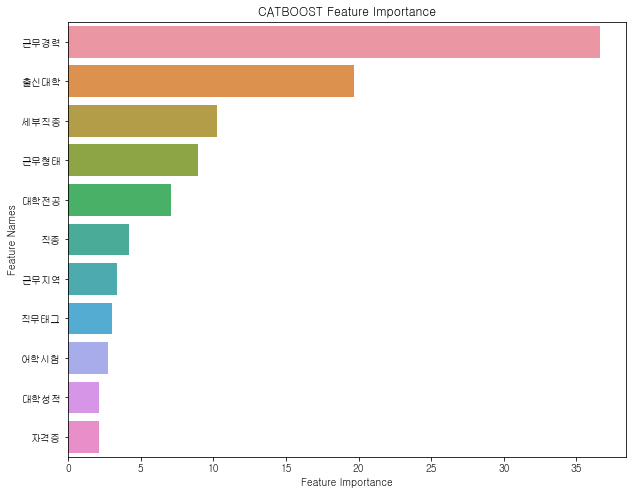

In [20]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plot_feature_importance(model.get_feature_importance(),X_test.columns,'CATBOOST')


In [16]:
#filename = f'catboost_{CATBOOST_VERSION}_{scores.mean():.2f}.csv'
#pd.DataFrame({'ID':test_id, 'Salary':oof_pred}).to_csv(filename, index=False)